In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("FINAL_DATASET_DATAMINING_UPDATED.csv")

X_final = df[['LOG_TUITIONFEE_IN', 'GRAD_RATE', 'LOG_DEBT_MDN']]

np.random.seed(42)
synthetic_y_adjusted = (
    0.4 * X_final['LOG_TUITIONFEE_IN'] +
    0.3 * X_final['GRAD_RATE'] +
    0.2 * X_final['LOG_DEBT_MDN'] +
    np.random.normal(0, 0.1, len(X_final))  # Reduced noise
)

X_train, X_test, y_train, y_test = train_test_split(X_final, synthetic_y_adjusted, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_preds = ridge.predict(X_test_scaled)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_preds))
ridge_r2 = r2_score(y_test, ridge_preds)

In [21]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)

In [22]:
print(f"Ridge Regression - RMSE: {ridge_rmse:.4f}, R² Score: {ridge_r2:.4f}")
print(f"Random Forest - RMSE: {rf_rmse:.4f}, R² Score: {rf_r2:.4f}")

Ridge Regression - RMSE: 0.0984, R² Score: 0.6969
Random Forest - RMSE: 0.1090, R² Score: 0.6282


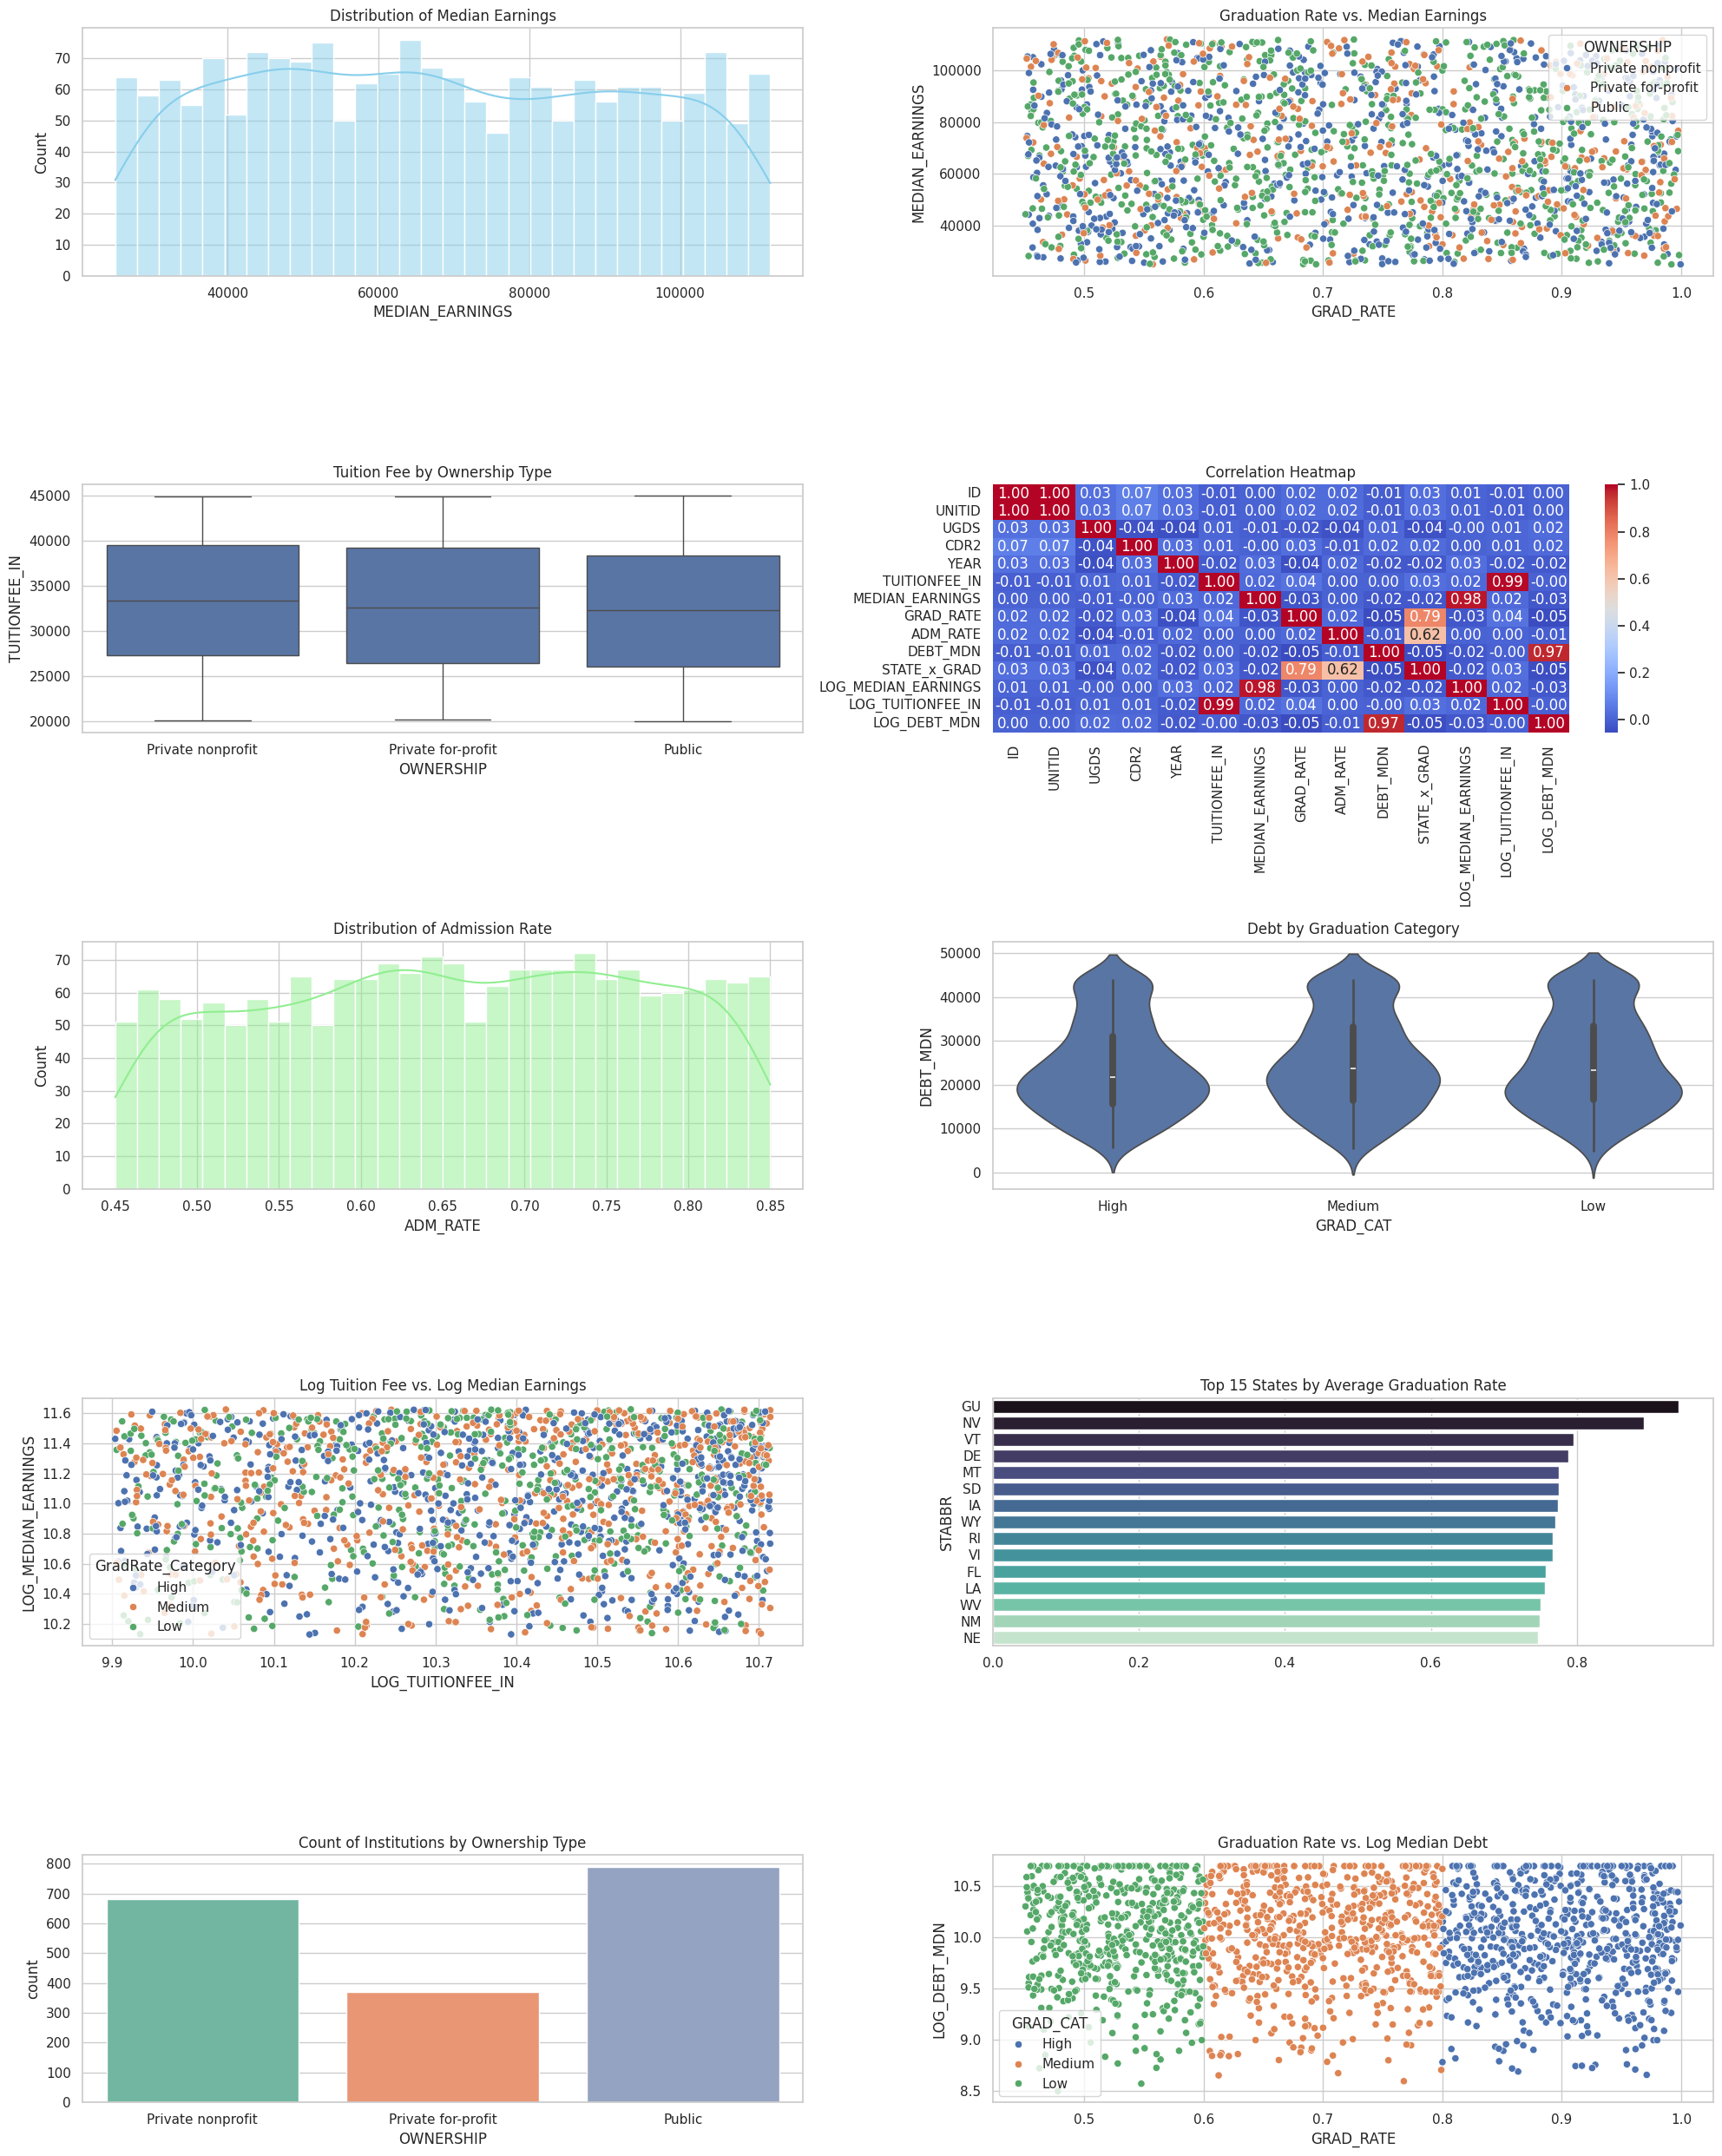

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
fig, axes = plt.subplots(5, 2, figsize=(20, 25))
axes = axes.flatten()

sns.histplot(df['MEDIAN_EARNINGS'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Median Earnings')

sns.scatterplot(data=df, x='GRAD_RATE', y='MEDIAN_EARNINGS', hue='OWNERSHIP', ax=axes[1])
axes[1].set_title('Graduation Rate vs. Median Earnings')

sns.boxplot(data=df, x='OWNERSHIP', y='TUITIONFEE_IN', ax=axes[2])
axes[2].set_title('Tuition Fee by Ownership Type')

corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[3])
axes[3].set_title('Correlation Heatmap')

sns.histplot(df['ADM_RATE'], bins=30, kde=True, ax=axes[4], color='lightgreen')
axes[4].set_title('Distribution of Admission Rate')

sns.violinplot(data=df, x='GRAD_CAT', y='DEBT_MDN', ax=axes[5])
axes[5].set_title('Debt by Graduation Category')

sns.scatterplot(data=df, x='LOG_TUITIONFEE_IN', y='LOG_MEDIAN_EARNINGS', hue='GradRate_Category', ax=axes[6])
axes[6].set_title('Log Tuition Fee vs. Log Median Earnings')

avg_grad_by_state = df.groupby('STABBR')['GRAD_RATE'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=avg_grad_by_state.values, y=avg_grad_by_state.index, ax=axes[7], hue=avg_grad_by_state.index, palette='mako', dodge=False, legend=False)
axes[7].set_title('Top 15 States by Average Graduation Rate')

sns.countplot(data=df, x='OWNERSHIP', ax=axes[8], hue='OWNERSHIP', palette='Set2', legend=False)
axes[8].set_title('Count of Institutions by Ownership Type')

sns.scatterplot(data=df, x='GRAD_RATE', y='LOG_DEBT_MDN', ax=axes[9], hue='GRAD_CAT')
axes[9].set_title('Graduation Rate vs. Log Median Debt')

plt.tight_layout()
plt.show()
